# PC lab: intro to Neural networks & PyTorch

<img src='http://www.joshclutter.com/img/bgimage.jpg'>

Deep learning is the subfield of machine learning that concerns neural networks with representation learning capabilities. As of recent years, it is arguably the most quickly growing field within machine learning, enjoying major breakthroughs every year. Although the popularity of neural nets is a recent phenomenon, they were first described by Warren McCulloch and Walter Pitts in 1943. Early progress in training competitive neural networks was stalled by a multitude of reasons, such as the limited computer resources, sub-optimal network architectures and the use of smaller datasets. In this PC-lab we will introduce you to the basics of implementing a neural network using standard practices.

# Background

The core unit of every (artificial) neural network is considered the neuron. The neuron can be observed as a switch. It receives **one or more inputs** $\mathbf{x}$, processes a **weighted sum** $z$ (adding **bias** $b$) that is sent through the **sigmoid activation function $\sigma()$**, outputting a **single response**  $a$:

$$ 
z = \sum\limits_{i=1}^{n}(w_ix_i) + b = \sum\limits_{i=0}^{n}(w_ix_i)$$ with $$ x_0 = 1 \\
$$

$$ a = \sigma(z) $$

<img src='https://i.pinimg.com/originals/16/2d/d5/162dd5c265cf8b5ce4bb27e5e022289f.jpg'>

The default recommended activation function is the **Rectified Linear Unit**, or **ReLU**. 

$$ ReLU(z) = max\{0,z\} $$

<img src="https://www.researchgate.net/profile/Hossam-H-Sultan/publication/333411007/figure/fig7/AS:766785846525952@1559827400204/ReLU-activation-function.png" style="width:15%">

The ReLU function has many properties that make optimization easy using gradient-based methods. It can be seen as a switch giving no response for $z < 0$ and giving a response $z$ for $z > 0$.

The most basic artificial neural network is the **feedforward neural network**. There are no feedback connections such as can be found in **recurrent neural networks**. A feedforward neural network is called a network as it is composed out of many inheriting functions making up the model, e.g. $f(\textbf{x})= f^{(3)}(f^{(2)}(f^{(1)}(\textbf{x})))$. Neural networks typically are constructed in different layers of neurons in which every neuron is connected with all the neurons of the previous layer, eventually resulting in a set of **output neurons** $\mathbf{\hat{\textbf{y}}}$.

To train the network, samples are processed in batches. This allows for faster training and improved convergence of the loss during gradient descent. Advantages of stochastic gradient descent or other optimization algorithms for loss calculation are not discussed in this PC-lab, but have been [extensively discussed](https://ruder.io/optimizing-gradient-descent/) before.
Practically, the first fully-connected layer of the network using batch size $B$ is computed by matrix combination of the input $X \in \mathbb{R}^{B, D}$ with a set of weights $W^{(1)} \in \mathbb{R}^{D, M}$.

\begin{equation}
XW^{(1)} =
\begin{bmatrix}
1 & x_{0,1} & ...  & x_{0,D-1} & x_{0,D} \\
1 & x_{1,1} & ... & x_{1,D-1} & x_{1,D} \\
... & ... & ... & ... & ...\\
1 & x_{B-1,1} & ... & x_{B-1,D-1} & x_{B-1,D} \\
1 & x_{B,1} & ...  & x_{B,D-1} & x_{B,D} \\
\end{bmatrix}
\begin{bmatrix}
W_{0,0} & W_{0,1} & ...  & W_{0,M-1} & W_{0,M} \\
W_{1,0} & W_{1,1} & ... & W_{1,M-1} & W_{1,M} \\
... & ... & ... & ... & ...\\
W_{D-1,0} & W_{D-1,1} & ... & W_{D-1,M-1} & W_{D-1,M} \\
W_{D,0} & W_{D,1} & ...  & W_{D,M-1} & W_{D,M} \\
\end{bmatrix}
\end{equation}

Activation of the first layer:

\begin{equation}
A^{(1)} =
ReLU(XW^{(1)})
\end{equation}

Adding a second layer means doing:

\begin{equation}
A^{(2)} =
ReLU(A^{(1)}W^{(2)})
\end{equation}

And so on ...

Note that at the output layer, no ReLUs would be used. For regression, no activation is necessary at the end. For binary classification, a sigmoid would be used (as this bounds the output between 0 and 1).

## PyTorch

To implement neural networks with more ease, a few high-level python libraries are available. In this lab, we will use [PyTorch](https://pytorch.org). PyTorch is the most popular library for deep learning as of today. For this course it offers the advantage that it has the most 'pythonic' syntax, to the point where almost all NumPy functions have a PyTorch counterpart.

We highly recommend you to use Google Colab for this PC lab, since we will be using GPU resources. Google Colab comes with everything pre-installed. If your computer has a GPU and you want to run code locally: you can find the installation instructions [here](https://pytorch.org/get-started/locally/).


In [1]:
import torch
import numpy as np

### Tensors

Tensors are the fundamental data structures in PyTorch. They are analogous to NumPy arrays. The difference is that tensors can also run on GPU hardware. GPU hardware is optimized for many small computations. Matrix multiplications, the building blocks of all deep learning, run orders-of-magnitude faster on GPU than on CPU. Let's see how tensors are constructed and what we can do with them:

In [2]:
x = [[5,8],[9,8]]
print(torch.tensor(x))
print(np.array(x))

tensor([[5, 8],
        [9, 8]])
[[5 8]
 [9 8]]


In [3]:
x_numpy = np.array(x)
print(torch.from_numpy(x_numpy))

x_torch = torch.tensor(x)
print(x_torch.numpy())

tensor([[5, 8],
        [9, 8]])
[[5 8]
 [9 8]]


In [4]:
print(np.random.randn(8).shape)
print(np.random.randn(8,50).shape)


print(torch.randn(8).shape) # an alternative for .shape in PyTorch is .size()
print(torch.randn(8,50).shape)

(8,)
(8, 50)
torch.Size([8])
torch.Size([8, 50])


In [5]:
print(np.zeros((8,50)).shape)
print(torch.zeros(8,50).shape) # works with 'ones' as well

(8, 50)
torch.Size([8, 50])


In [6]:
print(np.zeros(8).dtype)
print(torch.zeros(8).dtype)

float64
torch.float32


In PyTorch, the standard data type is `float32`, which is called `float` within its framework. `float64` is called `double`.
This is different from the NumPy defaults and naming conventions

In [7]:
x = torch.randn(8)
print(x.dtype)
x = x.to(torch.float64)
print(x.dtype)

torch.float32
torch.float64


`torch.long` is synonymous to `torch.int64`. The only difference between int32 and int64 is the amount of bytes with which you will store every integer. If you go up to very high numbers, you will get numerical overflow faster with more compressed data types. We recommend you to always use the defaults: `torch.long` and `torch.float`







In [8]:
x = torch.randint(low=0, high=8, size=(8,), dtype=torch.int32)
print(x)
print(x.dtype)
x = x.to(torch.long)
print(x.dtype)

tensor([2, 4, 7, 2, 3, 6, 7, 4], dtype=torch.int32)
torch.int32
torch.int64


Indexing and other operations work as in NumPy arrays

In [9]:
x = torch.randn(8,50,60)
print(x.shape)
print(x[:4,10:-10].shape)
x[0,0,:10] = 0
print(x[0,0,:16])

print(torch.min(x), torch.max(x), torch.min(torch.abs(x)))
# most of these functions are also tensor methods:
print(x.min(), x.max(), x.abs().min())

torch.Size([8, 50, 60])
torch.Size([4, 30, 60])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  1.1443, -0.1162,  0.5161, -1.1051, -1.3116,  0.5229])
tensor(-4.3105) tensor(4.1790) tensor(0.)
tensor(-4.3105) tensor(4.1790) tensor(0.)


In [10]:
print(x.shape)
x_cat0 = torch.cat([x, x], dim=0)
print(x_cat0.shape)
x_cat1 = torch.cat([x, x, x], dim=1)
print(x_cat1.shape)

torch.Size([8, 50, 60])
torch.Size([16, 50, 60])
torch.Size([8, 150, 60])


Matrix multiplication: let's say we have an input `x`, consisting of 8 samples with 26 features, that we linearly combine with weights `w` to get a single output for every sample:



In [11]:
x = torch.randn(8,26)
w = torch.randn(26,1)

y_hat = torch.matmul(x, w) # an alternative and equivalent syntax is x @ w
print(y_hat)
print(y_hat.shape)

tensor([[ 2.3585],
        [ 5.1500],
        [ 1.0405],
        [ 3.3401],
        [-1.7413],
        [-1.9034],
        [ 1.5912],
        [ 4.2859]])
torch.Size([8, 1])


Note that matrix multiplication is different from element-wise multiplication. For element-wise, `*` is used.

# Building a neural network in PyTorch

Neural networks are initialized through the use of class objects. You have encountered class objects already during this course: sklearn models are all class objects. The difference here is that we will code our own class first, before using it.

Many of the functionalities necessary to create [**all types of neural networks**](http://www.asimovinstitute.org/neural-network-zoo/) have [**already been implemented**](http://pytorch.org/docs/master/nn.html).

The following code shows the most basic blueprint for a PyTorch neural network:

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class ExampleNet(nn.Module):
    def __init__(self, hyperparameter_1=50):
        super().__init__()

        # create class attributes such as layers
        # e.g. self.W = nn.Linear(80,1) makes a fully connected layer with 80 input neurons and 1 output neuron

    def forward(self, x):
        # use your layers here
        # e.g. x = self.W(x) uses the fully connected layer from previously (in essence, it just does a matrix multiplication with the weights stored in self.W)
        return x

ExampleNet() # the value for hyperparameter_1 will become the default = 50
ExampleNet(hyperparameter_1=25)

ExampleNet()

<div class="alert alert-success">

<b>EXERCISE:</b> 
<p>Implement a neural network with 2 hidden layers. The network should take samples with 80 features as input ($n\times80$). The first layer should have 40 hidden neurons, the second 20, and the last layer (also called the prediction head or output head) should return 1 number for every input ($n\times1$).</p>

</div>

Make use of the previous blueprint for general layout, the [Linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) for linear combination, and the [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) for activations.

In [13]:
# for testing the model, we generate a random input of 16 samples
X = torch.randn(16,80)


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(80,40)
        self.ReLU1 = nn.ReLU()
        self.linear2 = nn.Linear(40,20)
        self.ReLU2 = nn.ReLU()
        self.out = nn.Linear(20,1)


    def forward(self, x):

        x = self.ReLU1(self.linear1(x))
        x = self.ReLU2(self.linear2(x))
        x = self.out(x)
        return x


model = Net()

y_hat = model(X)
print(y_hat.shape)

torch.Size([16, 1])


We can now see how models work on GPU. In order to do this, we need to place both the input and the model itself on the 'CUDA' device:

Note that to run this code block you need to request access to a GPU from Google Colab. To do this, go to Runtime > Change runtime type > Hardware accelerator = GPU

In [14]:
model = model.to('cuda')
print(X.device)
X = X.to('cuda')
print(X.device)

y_hat = model(X)

y_hat

cpu
cuda:0


tensor([[-0.0876],
        [-0.0543],
        [-0.1440],
        [-0.1161],
        [-0.0853],
        [-0.1022],
        [-0.1254],
        [-0.1552],
        [-0.0434],
        [-0.0451],
        [-0.1149],
        [-0.0492],
        [-0.1233],
        [-0.0571],
        [-0.0157],
        [-0.0669]], device='cuda:0', grad_fn=<AddmmBackward>)

Notice how the output is still on the cuda device. Also, the output has a `grad_fn` attribute. This grad function will be used by PyTorch automatic differentation module to perform backward passes and compute gradients for every parameter with respect to the loss/cost function.

# Model training

Now that we know how to define a network and implement its forward pass, it's time to make the network learn. To illustrate learning, we will create a toy example. By running the code below, you see a classification problem consisting of 4 half circles that are interleaved with each other. It should be clear from the visualization that simple linear models will not be able to solve this problem.

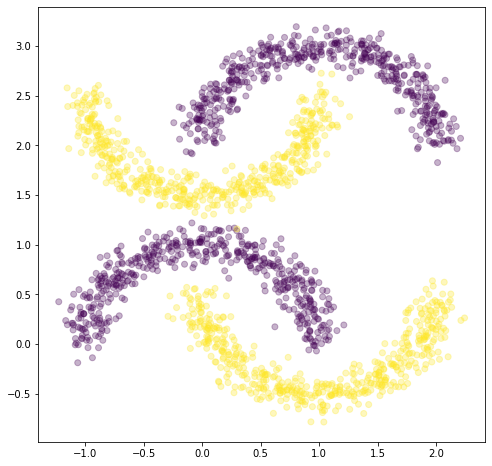

In [15]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
 
X, y1 = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
X2, y2 = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
X2[:,0] = -X2[:,0]
X2[:,0] += 1
X2[:,1] += 2

X = np.concatenate([X,X2])
y = np.concatenate([y1,y2])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3)
plt.show()

In [16]:
# split the numpy arrays and convert to tensors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train = torch.from_numpy(X_train).to(torch.float)
X_test = torch.from_numpy(X_test).to(torch.float)
y_train = torch.from_numpy(y_train).unsqueeze(-1).to(torch.float)
y_test = torch.from_numpy(y_test).unsqueeze(-1).to(torch.float)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([1600, 2]) torch.Size([400, 2]) torch.Size([1600, 1]) torch.Size([400, 1])


<div class="alert alert-success">

<b>EXERCISE:</b> 
<p>Copy paste your model from the previous exercise so that it: (1) accepts two-dimensional inputs (instead of 80-dimensional) and (2) has an output bounded from 0 to 1, using a sigmoid function (available from PyTorch). The rest of the model can be kept the same (or experiment as you see fit).</p>

</div>

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(2,40)
        self.ReLU1 = nn.ReLU()
        self.linear2 = nn.Linear(40,20)
        self.ReLU2 = nn.ReLU()
        self.out = nn.Linear(20,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.ReLU1(self.linear1(x))
        x = self.ReLU2(self.linear2(x))
        x = self.out(x)
        return self.sigmoid(x)

model = Net()

The most basic training set-up in PyTorch contains the following:
- Instantiate the model
- Insantiate a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Instantiate an [optimizer object](https://pytorch.org/docs/stable/optim.html), to which you pass the parameters you want to optimize
- Wrap your data splits in a [data loader](https://pytorch.org/docs/stable/data.html)
- Iterate through your training data, for every batch:
    - reset the gradients
    - do forward pass
    - compute loss
    - backward pass
    - update parameters

<div class="alert alert-success">

<b>EXERCISE:</b> 
<p>Complete the missing code in the training loop. Add a validation loop similar to the training loop. Remember that not all steps necessary for training are needed for validation (i.e. everything gradient-related).</p>

</div>

You can find what kind of inputs the BCELoss expects [here](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss). Every loss function will behave differently. For example, [BCELossWithLogits](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss) computes the same loss, but expects your model output to not have been through a sigmoid function already. Instead, this loss function combines the sigmoid operation and BCELoss in one.

In [18]:
from time import time

model = Net()

#model = model.to('cuda') # uncomment to use GPU, only faster for bigger models

CrossEntropyLoss = nn.BCELoss() 

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.99) # SGD = stochastic gradient descent

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, pin_memory=True, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, pin_memory=True, shuffle=True)


for n in range(100): # 100 epochs
    t = time()

    ########## Training loop ##########
    model.train() # set model in training mode
    train_loss_sum = 0
    for i, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        X_batch, y_batch = batch

        #X_batch = X_batch.to('cuda')  # uncomment to use GPU, only faster for bigger models
        #y_batch = y_batch.to('cuda')  # uncomment to use GPU, only faster for bigger models

        y_hat = model(X_batch) # forward pass
        loss = CrossEntropyLoss(y_hat, y_batch) # compute loss

        loss.backward()   # Calculate gradients
        optimizer.step()   # Update weights using defined optimizer
        train_loss_sum += loss.item()


    ########## Validation loop (with test data here since it's a toy problem) ##########

    # we will record these things to do some computations at the end of the epoch
    predicted_ys = []
    true_ys = []

    # all code within this 'with' construct will not keep gradients. This is not necessary in the validation loop:
    with torch.no_grad():

        model.eval()
        test_loss_sum = 0
        for i, batch in enumerate(test_dataloader):
            X_batch, y_batch = batch

            #X_batch = X_batch.to('cuda')  # uncomment to use GPU, only faster for bigger models
            #y_batch = y_batch.to('cuda')  # uncomment to use GPU, only faster for bigger models
            
            y_hat = model(X_batch) # forward pass
            loss = CrossEntropyLoss(y_hat, y_batch) # compute loss

            test_loss_sum += loss.item()

            predicted_ys.append(y_hat) 
            true_ys.append(y_batch) 

        predicted_ys_all = torch.cat(predicted_ys)
        true_ys_all = torch.cat(true_ys)
        test_acc = torch.sum((predicted_ys_all > 0.5) == true_ys_all).item()/len(true_ys_all)
    

    print('epoch', n, 'train_loss', np.round(train_loss_sum/len(train_dataloader),4),
          'test_loss', np.round(test_loss_sum/len(test_dataloader),4), 
          'test_acc', np.round(test_acc,4),
          'time_elapsed', np.round(time()-t,4), sep="\t")
    t = time()

epoch	0	train_loss	0.6534	test_loss	0.5839	test_acc	0.655	time_elapsed	0.0927
epoch	1	train_loss	0.5512	test_loss	0.4809	test_acc	0.745	time_elapsed	0.064
epoch	2	train_loss	0.4897	test_loss	0.4089	test_acc	0.83	time_elapsed	0.0593
epoch	3	train_loss	0.3972	test_loss	0.3277	test_acc	0.8825	time_elapsed	0.0587
epoch	4	train_loss	0.3259	test_loss	0.3512	test_acc	0.8525	time_elapsed	0.0618
epoch	5	train_loss	0.2526	test_loss	0.198	test_acc	0.925	time_elapsed	0.0624
epoch	6	train_loss	0.2434	test_loss	0.2135	test_acc	0.9075	time_elapsed	0.0608
epoch	7	train_loss	0.2658	test_loss	0.3569	test_acc	0.825	time_elapsed	0.0599
epoch	8	train_loss	0.1919	test_loss	0.2326	test_acc	0.89	time_elapsed	0.0621
epoch	9	train_loss	0.1728	test_loss	0.1334	test_acc	0.945	time_elapsed	0.0627
epoch	10	train_loss	0.1191	test_loss	0.1066	test_acc	0.97	time_elapsed	0.059
epoch	11	train_loss	0.0751	test_loss	0.0562	test_acc	0.9825	time_elapsed	0.0575
epoch	12	train_loss	0.0543	test_loss	0.0549	test_acc	0.99	time_e

During the training process, we have used one part of the data to train on and one part of the data to evaluate on. It is good practice to follow the training process on a non-training split, so that we can see if/when the model starts overfitting. For example, after every train + val epoch, one could perform a check to see if the val accuracy was the best one encountered yet. Based on this criterium, the model can then be saved on disk. This way, after training, only the model with the best validation performance is kept.

As a reward for your efforts, this last code block makes a visualization of the output landscape that the model has learnt.


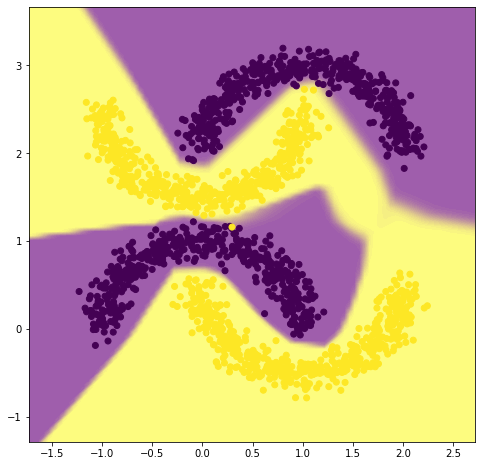

In [19]:
xx = np.arange(X[:,0].min()-.5, X[:,0].max()+.5, 0.05)
yy = np.arange(X[:,1].min()-.5, X[:,1].max()+.5, 0.05)

XX, YY = np.meshgrid(xx, yy)
inp_dat = np.hstack((XX.reshape(-1,1), YY.reshape(-1,1)))

outp_dat = np.zeros(inp_dat.shape[0])
with torch.no_grad():
    for i in range(0,inp_dat.shape[0],32):
        X_i = inp_dat[i:i+32,:]
        X_i = torch.from_numpy(X_i).to(torch.float)
        y_out = model(X_i)
        outp_dat[i:i+32] = y_out.squeeze(-1).numpy()
outp_dat = outp_dat.reshape(XX.shape)

from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
default_cmap = cm.get_cmap('viridis', 2).colors
lighter_cmap = LinearSegmentedColormap.from_list(name='lighter_cmap', colors=np.minimum(default_cmap+.35,1))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.contourf(XX, YY, outp_dat, levels=25, cmap=lighter_cmap)
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=1)
plt.show()

<b>EXTRA OPTIONAL EXERCISE:</b> 
<p>Play around with some hyperparameters that we defined:

- learning rate
- momentum of SGD
- batch size
- model architecture

In particular, look how fast the model learns without momentum. What is momentum exactly doing?</p>

</div>
